In [1]:
# python standard libraries
import numpy as np
import os

# import csma model
from generic_csma import symbolic_CSMA

# matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# import networkx to show csma graph
import networkx as nx

# import implemented function which facilitate notebook usage
from other_functions.load_display_steady_state import print_available_configurations, get_simulation_filenames, calculate_mean_var, calculate_mean_var_avg_queue
from run_simulations import load_or_run_approx

simu_dir = 'saved_simulations/'
# plot_dir = '../two-timescale-mf/plots/'
det_values_dir = 'saved_det_values/'
plot_dir = 'plots/'


ModuleNotFoundError: No module named 'scipy'

## Show all available configuration for which pre run simulations exist

Note: It is possible to run other configurations. See the README.md for more information

In [2]:
print_available_configurations(path=simu_dir)  

Available Configurations -- copy and paste to define model --

##### 

G = np.array([[0,1,0],
 [1,0,1],
 [0,1,0]])
_lambda = np.array([0.5,0.7,0.7])
nu = np.array([4.,3.,3.])
mu = np.array([3.,3.,2.])
buffer_size = 10

#####

G = np.array([[0,1,1,1,1,1,1,1,1,1],
 [1,0,1,0,0,0,0,0,0,0],
 [1,1,0,0,1,0,0,1,0,0],
 [1,0,0,0,0,0,0,0,0,0],
 [1,0,1,0,0,0,0,1,0,0],
 [1,0,0,0,0,0,0,0,1,0],
 [1,0,0,0,0,0,0,0,1,0],
 [1,0,0,0,0,0,0,0,1,0],
 [1,0,0,0,0,1,1,1,0,1],
 [1,0,0,0,0,0,0,0,1,0]])
_lambda = np.array([0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4])
nu = np.array([3.,3.,3.,3.,3.,3.,3.,3.,3.,3.])
mu = np.array([3.,3.,3.,3.,3.,3.,3.,3.,3.,3.])
buffer_size = 10

#####

G = np.array([[0,1,0],
 [1,0,1],
 [0,1,0]])
_lambda = np.array([0.4,0.2,0.5])
nu = np.array([1.2,2. ,1.5])
mu = np.array([1.4,1.3,1.7])
buffer_size = 10

#####

G = np.array([[0,1],
 [1,0]])
_lambda = np.array([0.4,0.2])
nu = np.array([1.2,2. ])
mu = np.array([2.,2.])
buffer_size = 10

#####

G = np.array([[0,1,0],
 [1,0,1],
 [0,1,0]])
_

## Specify Model Parameters,  Initialize Model and Load Simus

In [3]:
G = np.array([[0, 1, 0],
              [1, 0, 1],
              [0, 1, 0]])
_lambda = np.array([0.4, 0.2, 0.5])
nu = np.array([1.2, 2., 1.5])
mu = np.array([1.4, 1.3, 1.7])
buffer_size = 10

## Initialize the model,  load steady-state simulations and display the interference graph

Savefiles with the same parameter configuration:

N:  40  nr_simus:  40   --	 3_node_N_40_csma_101947.npy
N:  50  nr_simus:  40   --	 3_node_N_50_csma_102430.npy
N:  10  nr_simus:  40   --	 3_node_N_10_csma_1066.npy
N:  20  nr_simus:  40   --	 3_node_N_20_csma_101045.npy
N:  60  nr_simus:  40   --	 3_node_N_60_csma_10941.npy
N:  75  nr_simus:  40   --	 3_node_N_75_csma_113846.npy
N:  100  nr_simus:  40   --	 3_node_N_100_csma_115429.npy
N:  30  nr_simus:  40   --	 3_node_N_30_csma_101514.npy


files =  ['3_node_N_40_csma_101947.npy', '3_node_N_50_csma_102430.npy', '3_node_N_10_csma_1066.npy', '3_node_N_20_csma_101045.npy', '3_node_N_60_csma_10941.npy', '3_node_N_75_csma_113846.npy', '3_node_N_100_csma_115429.npy', '3_node_N_30_csma_101514.npy']

Visualisation of G


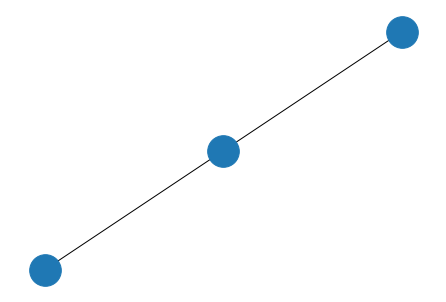

In [4]:
# model initialization
csma = symbolic_CSMA(nu, mu, _lambda, G, buffer_size)

# load simulations
simus = get_simulation_filenames(path=simu_dir, csma_model=csma, verbose=True)

# display interference graph G
try:
    nx_G = nx.from_numpy_matrix(G)
    nx.draw(nx_G, arrows=False, node_size=1000)
    plt.savefig(plot_dir + 'Graph.png')
    print('\nVisualisation of G')
except:
    pass

### Compute / Load  Mean Field + Refinements

In [5]:
X_equi, v, s, t, w, u = load_or_run_approx(csma, dir=det_values_dir)

Existing save file found! - No computations needed

 ** Computations Loaded ** 



# Transient Plot

### Computation of Values

In [6]:
# computation of transient mean field values
T_trans, X_trans = csma.ode(time=30)

Integrating MF


In [7]:
# if available the code below loads the transient values
try:
    value_list_trans = []
    for _dict in np.load(simu_dir + 'trans_simulations_mean_conf.npy', allow_pickle=True):
        sim_mean = _dict['mean']
        conf95 = _dict['conf']
        N = _dict['N']
        interpolation_times = _dict['interpolation_times']

        value_list_trans.append((sim_mean, conf95, N, interpolation_times))
except FileNotFoundError:
    print("No savefiles found, please run the next code cells.")

### To compute new values uncomment the lines below

Depending on the amount of sample trajectories this can become time intensive.

In [29]:
# run transient simulations and calculate sim mean and sim variance

# uncomment to run the transient simulations
value_list_trans = []
for N in [10, 20, 50]:
    print('N = {}'.format(N))
    nr_simus = 20
    sim_mean, sim_var, interpolation_times = csma.calculate_mean_var(nr_simus=nr_simus, N=N, time=30, time_steps=1000)
    conf95 = 2 * np.sqrt(sim_var) / np.sqrt(nr_simus)
    value_list_trans.append((sim_mean, conf95, N, interpolation_times))


N = 10
Simulating:


100%|███████████████████████████████████████████| 20/20 [00:02<00:00,  6.93it/s]


Computing Variance:


100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 12.96it/s]


N = 20
Simulating:


100%|███████████████████████████████████████████| 20/20 [00:04<00:00,  4.01it/s]


Computing Variance:


100%|███████████████████████████████████████████| 20/20 [00:02<00:00,  9.01it/s]


N = 50
Simulating:


100%|███████████████████████████████████████████| 20/20 [00:11<00:00,  1.76it/s]


Computing Variance:


100%|███████████████████████████████████████████| 20/20 [00:03<00:00,  6.10it/s]


In [31]:
# save values


if input('save values (y/n):') == 'y':
    np_save_list = []
    for (sim_mean, conf95, N, interpolation_times) in value_list_trans:
        value_dict_trans = {}
        value_dict_trans['mean'] = sim_mean
        value_dict_trans['conf'] = conf95
        value_dict_trans['N'] = N
        value_dict_trans['interpolation_times'] = interpolation_times

        np_save_list.append(value_dict_trans)
    np_save_list = np.array(np_save_list)
    np.save(simu_dir + 'trans_simulations_mean_conf.npy', np_save_list)

save values (y/n):y


### Actual Plotting

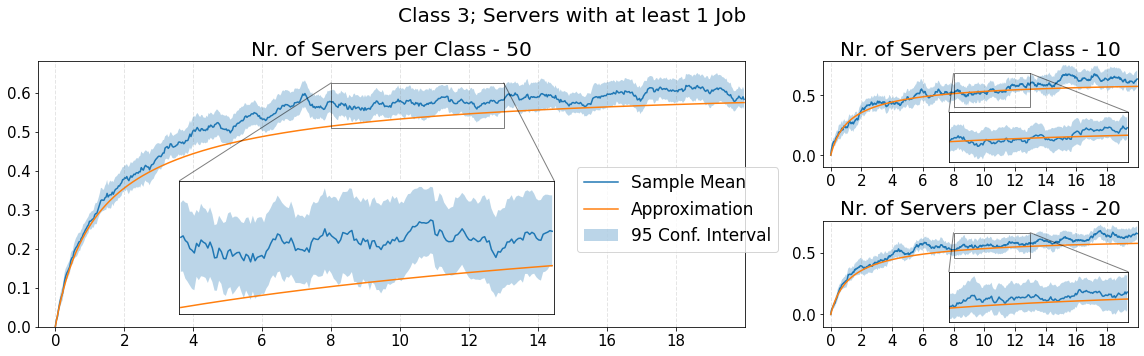

In [8]:
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True, figsize=(16,5))
gs = gridspec.GridSpec(2, 3, height_ratios=[1, 1])

c, b = 2, 0

fig.suptitle('Class {}; Servers with at least {} Job'.format(c+1, b+1), fontsize=20)

axes = [fig.add_subplot(gs[0, 2]), fig.add_subplot(gs[1, 2]), fig.add_subplot(gs[:, 0:2]),]

for _i, (sim_mean, conf95, N, interpolation_times) in enumerate(value_list_trans):
    ax = axes[_i]
    
    if _i == 2:
        t_s, t_e = 0, 20
    else:
        t_s, t_e = 0, 20
        
    t_zoom_s, t_zoom_e = 8, 13

    stepsize = int((t_e-t_s)/7)

    ax.set_xticks(np.arange(t_s, t_e, stepsize))
    ax.tick_params(labelsize=15)

    s_index, e_index = np.where(interpolation_times >= t_s)[0][0], np.where(interpolation_times >= t_e)[0][0]
    s_mf_index, e_mf_index = np.where(T_trans >= t_s)[0][0], np.where(T_trans >= t_e)[0][0]

    zoom_s, zoom_e = np.where(interpolation_times >= t_zoom_s)[0][0], np.where(interpolation_times >= t_zoom_e)[0][0]
    zoom_mf_s, zoom_mf_e = np.where(T_trans >= t_zoom_s)[0][0], np.where(T_trans >= t_zoom_e)[0][0]

    ax.set_xlim([ t_s - 0.5,interpolation_times[e_index]])
    if _i == 2:
        ax.set_ylim(bottom=0, top=(sim_mean + conf95)[s_index:e_index,c,b].max()+0.03)
    else:
        ax.set_ylim(bottom=(sim_mean + conf95)[s_index:e_index,c,b].min()-0.1, top=(sim_mean + conf95)[s_index:e_index,c,b].max()+0.03)

    ax.plot(interpolation_times[s_index:e_index], sim_mean[s_index:e_index,c,b], label='Sample Mean')
    ax.plot(T_trans[s_index:e_index], X_trans[s_index:e_index,c,b], label='Approximation')


    for _t in range(t_s,t_e+stepsize,stepsize):
        ax.axvline(x=_t, color = 'grey', linestyle='--', alpha=0.2, lw=1)

    ax.fill_between(interpolation_times[s_index:e_index], (sim_mean - conf95)[s_index:e_index,c,b], (sim_mean + conf95)[s_index:e_index,c,b], alpha=0.3, label='95 Conf. Interval')


    if _i == 2:
        axins = ax.inset_axes([0.2,0.05,0.53,0.5])
        axins.plot(interpolation_times[zoom_s:zoom_e], sim_mean[zoom_s:zoom_e,c,b])
        axins.fill_between(interpolation_times[zoom_s:zoom_e], (sim_mean - conf95)[zoom_s:zoom_e,c,b], (sim_mean + conf95)[zoom_s:zoom_e,c,b], alpha=0.3)
        axins.plot(T_trans[zoom_mf_s:zoom_mf_e], X_trans[zoom_mf_s:zoom_mf_e, c, b])
        axins.set_xlim([t_zoom_s,t_zoom_e])
        ax.legend(bbox_to_anchor=(0.75, 0.25), fontsize=17)
    else:
        axins = ax.inset_axes([0.4,0.05,0.57,0.47])
        axins.plot(interpolation_times[zoom_s:zoom_e], sim_mean[zoom_s:zoom_e,c,b])
        axins.fill_between(interpolation_times[zoom_s:zoom_e], (sim_mean - conf95)[zoom_s:zoom_e,c,b], (sim_mean + conf95)[zoom_s:zoom_e,c,b], alpha=0.3)
        axins.plot(T_trans[zoom_mf_s:zoom_mf_e], X_trans[zoom_mf_s:zoom_mf_e, c, b])
        axins.set_xlim([t_zoom_s,t_zoom_e])
    axins.set_xticks([])
    axins.set_yticks([])
    ax.indicate_inset_zoom(axins, edgecolor="black")
    ax.set_title('Nr. of Servers per Class - {}'.format(N), fontsize=20)
    
    
# axes[-1].legend(bbox_to_anchor=(0.91, 0.25), borderaxespad=0, fontsize=13)

fig.savefig(plot_dir + 'transient.pdf', bbox_inches="tight")
plt.show()


## Steady-State for Average Queue Length distribution

In [9]:
mean_dict, var_dict, list_N, dict_nr_simus = calculate_mean_var_avg_queue(simus)

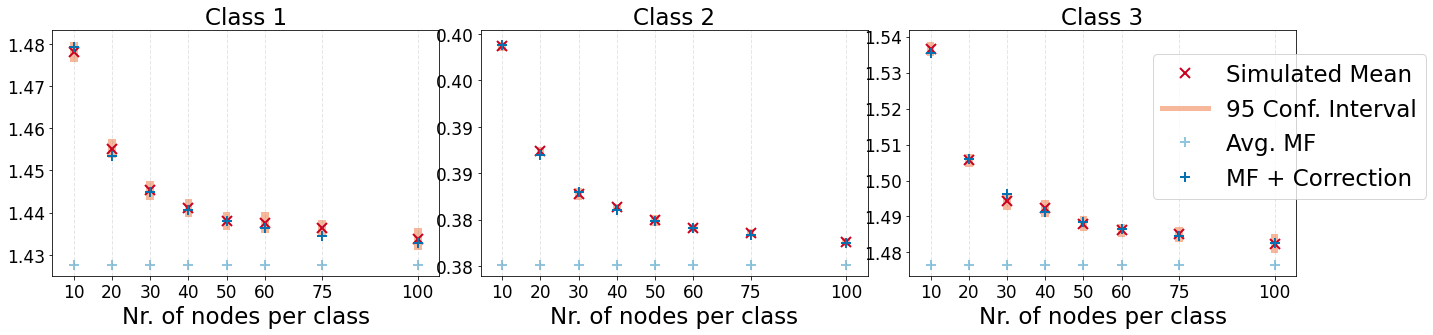

In [10]:
from matplotlib.ticker import FormatStrFormatter

classes = X_equi.shape[0]
buffer_size = X_equi.shape[1]


fig, axes = plt.subplots(1, classes, figsize=(18,4), sharex=True)
fig.tight_layout()

_list_N = list_N[0:]

markersize = 10
fontsize = 23
alpha=0.8

markeredgewidth = 2

colors = ['#ca0020','#f4a582','#92c5de','#0571b0']

for c, ax in enumerate(axes):
    # axis setup and labeling
    ax.set_xticks(_list_N)
    ax.tick_params(labelsize=17)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_title(r'Class {}'.format(c+1), fontsize=fontsize)
    if c == 0 or c == 2 or c == 1:
        ax.set_xlabel('Nr. of nodes per class', fontsize=fontsize)
        
    # plot data
    for N in _list_N:
        avg_X = mean_dict[N][c]
        nr_simus = dict_nr_simus[N]
        # compute confidence interval from data
        _95conf = 2 * np.sqrt(var_dict[N][c]) / np.sqrt(nr_simus)
        
        ax.plot(N, avg_X, 'x', color=colors[0], markersize=markersize, markeredgewidth=markeredgewidth)
        ax.bar(N, 2* _95conf, width=2, bottom=avg_X - _95conf, alpha=alpha, color=colors[1])
        ax.plot(N, np.sum(X_equi[c]), '+', color=colors[2], markersize=markersize, markeredgewidth=markeredgewidth)
        ax.plot(N, np.sum((X_equi + (v-s-t)/N)[c]), '+', color=colors[3], markersize=markersize, markeredgewidth=markeredgewidth)
        
        # add vertical subtle grey lines for each N
        ax.axvline(x = N, color = 'grey', linestyle='--', alpha=0.2, lw=1)

        
# create legend
custom_lines = [Line2D([0], [0], marker='x', color=colors[0], label='Simulated Mean', linestyle='', markersize=10, markeredgewidth=markeredgewidth),
                Line2D([0], [0], color=colors[1], label='95 Conf. Interval', linestyle='-', linewidth=5, alpha=alpha, markersize=10, markeredgewidth=markeredgewidth),
                Line2D([0], [0], marker='+', color=colors[2], label='Avg. MF', linestyle='', markersize=10, markeredgewidth=markeredgewidth),
                Line2D([0], [0], marker='+', color=colors[3], label='MF + Correction', linestyle='', markersize=10, markeredgewidth=markeredgewidth)]

axes[-1].legend(handles=custom_lines, fontsize=fontsize, bbox_to_anchor=(0.6, 0.95))

# save and plot file
fig.savefig(plot_dir + '3_node_avg_queue_len_plot.pdf', bbox_inches="tight")
plt.show()